In [42]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

%config InlineBackend.figure_format = 'svg'
%matplotlib inline

sns.set(rc={'figure.figsize':(14,8)},style='white',font_scale=1.4)

## Intro

This notebook takes a look at the results of a college courses survey on programming languages. This is an example of visualizing the survey results.

In [43]:
df = pd.read_csv("/home/jdoz/Downloads/Data Analysis/HW/mspa-survey-data.csv")

In [44]:
df.head()

,RespondentID,Personal_JavaScalaSpark,Personal_JavaScriptHTMLCSS,Personal_Python,Personal_R,Personal_SAS,Professional_JavaScalaSpark,Professional_JavaScriptHTMLCSS,Professional_Python,Professional_R,...,PREDICT453,PREDICT454,PREDICT455,PREDICT456,PREDICT457,OtherPython,OtherR,OtherSAS,Other,Graduate_Date
0,5135740122,0,0,0,50,50,0,0,0,25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5133300037,10,10,50,30,0,25,25,30,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spring 2018
2,5132253300,20,0,40,40,0,0,0,40,40,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fall 2018
3,5132096630,10,10,25,35,20,10,10,25,35,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fall 2017
4,5131990362,20,0,0,70,10,20,0,0,80,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CS-435 with Weka,Fall 2018


In [45]:
df.columns

Index(['RespondentID', 'Personal_JavaScalaSpark', 'Personal_JavaScriptHTMLCSS',
       'Personal_Python', 'Personal_R', 'Personal_SAS',
       'Professional_JavaScalaSpark', 'Professional_JavaScriptHTMLCSS',
       'Professional_Python', 'Professional_R', 'Professional_SAS',
       'Industry_JavaScalaSpark', 'Industry_JavaScriptHTMLCSS',
       'Industry_Python', 'Industry_R', 'Industry_SAS',
       'Python_Course_Interest', 'Foundations_DE_Course_Interest',
       'Analytics_App_Course_Interest', 'Systems_Analysis_Course_Interest',
       'Courses_Completed', 'PREDICT400', 'PREDICT401', 'PREDICT410',
       'PREDICT411', 'PREDICT413', 'PREDICT420', 'PREDICT422', 'PREDICT450',
       'PREDICT451', 'PREDICT452', 'PREDICT453', 'PREDICT454', 'PREDICT455',
       'PREDICT456', 'PREDICT457', 'OtherPython', 'OtherR', 'OtherSAS',
       'Other', 'Graduate_Date'],
      dtype='object')

In [46]:
df = df[
    [
        "RespondentID",
        "Courses_Completed",
        "Personal_JavaScalaSpark",
        "Personal_JavaScriptHTMLCSS",
        "Personal_Python",
        "Personal_R",
        "Personal_SAS",
        "Professional_JavaScalaSpark",
        "Professional_JavaScriptHTMLCSS",
        "Professional_Python",
        "Professional_R",
        "Professional_SAS",
        "Industry_JavaScalaSpark",
        "Industry_JavaScriptHTMLCSS",
        "Industry_Python",
        "Industry_R",
        "Industry_SAS",
        "Python_Course_Interest",
    ]
]

In [47]:
df1 = df.melt(
    id_vars=["RespondentID", "Courses_Completed", "Python_Course_Interest"],
    value_name="Percent",
    var_name="Language",
)

### You could reverse this with df.pivot_table

In [48]:
df1["Category"] = df1["Language"].apply(lambda x: x.split("_")[0])

In [49]:
df1["Lang"] = df1["Language"].apply(lambda x: x.split("_")[1])

### Lambda Examples
Lambda is just a temporary function that can be used inline in most cases

In [13]:
list(map(lambda x : color_dict[x], [1, 2, 3, 2]))

['red', 'black', 'purple', 'black']

### Map Example with Pandas

In [50]:
languages = list(df1["Lang"].unique())
languages

['JavaScalaSpark', 'JavaScriptHTMLCSS', 'Python', 'R', 'SAS']

In [51]:
languages_short = ["Java", "JS", "Python", "R", "$A$"]

### List comprehension
Allows you to do inline for loops. It works for list,tuples,and dictionaries
This is just creating a dictionary that would map the language value in the DF
to something different.

zip takes 2 equally sized lists and "zips" them together along the same index 
(1st,1st),(2nd,2nd) etc....

In [52]:
language_dict = {x: y for x, y in zip(languages, languages_short)}

In [53]:
df1["ShortLang"] = df1["Lang"].map(language_dict)
df1["ShortLang"].unique()

array(['Java', 'JS', 'Python', 'R', '$A$'], dtype=object)

In [54]:
a = [1, 2, 3, 4]
b = ["a", "b", "c", "d"]
list(zip(a, b))

[(1, 'a'), (2, 'b'), (3, 'c'), (4, 'd')]

## Back to the EDA

In [55]:
## Re defining df1 since I added columns above

df1 = df.melt(
    id_vars=["RespondentID", "Courses_Completed", "Python_Course_Interest"],
    value_name="Percent",
    var_name="Language",
)
df1["Category"] = df1["Language"].apply(lambda x: x.split("_")[0])
df1["Lang"] = df1["Language"].apply(lambda x: x.split("_")[1])

In [56]:
df1.groupby(["Category", "Lang"])["Percent"].describe()

count       mean        std  min   25%   50%  \
Category     Lang                                                              
Industry     JavaScalaSpark     207.0  11.942029  14.706399  0.0   0.0   5.0   
             JavaScriptHTMLCSS  207.0   6.966184  10.030721  0.0   0.0   0.0   
             Python             207.0  29.772947  17.959816  0.0  20.0  30.0   
             R                  207.0  32.434783  15.912209  0.0  22.5  30.0   
             SAS                207.0  18.884058  19.137623  0.0   0.0  15.0   
Personal     JavaScalaSpark     207.0  10.135266  11.383477  0.0   0.0   9.0   
             JavaScriptHTMLCSS  207.0   4.797101   6.757764  0.0   0.0   0.0   
             Python             207.0  31.304348  15.570982  0.0  20.0  30.0   
             R                  207.0  37.125604  14.576003  0.0  30.0  35.0   
             SAS                207.0  16.637681  13.626400  0.0   5.0  15.0   
Professional JavaScalaSpark     207.0   9.251208  13.167505  0.0   0.0   5.0   
             JavaScriptHTMLCSS  207.0   5.840580  10.812555  0.0   0.0   0.0   
             Python             207.0  30.028986  19.144802  0.0  20.0  30.0   
             R                  207.0  36.415459  20.847606  0.0  25.0  33.0   
             SAS                207.0  18.463768  18.831841  0.0   0.0  15.0   

                                 75%    max  
Category     Lang                            
Industry     JavaScalaSpark     20.0   70.0  
             JavaScriptHTMLCSS  10.0   50.0  
             Python             40.0   95.0  
             R                  40.0   85.0  
             SAS                30.0  100.0  
Personal     JavaScalaSpark     20.0   70.0  
             JavaScriptHTMLCSS  10.0   30.0  
             Python             40.0   90.0  
             R                  50.0  100.0  
             SAS                25.0   75.0  
Professional JavaScalaSpark     15.0   80.0  
             JavaScriptHTMLCSS  10.0  100.0  
             Python             40.0  100.0  
             R                  50.0  100.0  
             SAS                30.0  100.0

In [57]:
df1.groupby("Lang")["Percent"].mean()

Lang
JavaScalaSpark       10.442834
JavaScriptHTMLCSS     5.867955
Python               30.368760
R                    35.325282
SAS                  17.995169
Name: Percent, dtype: float64

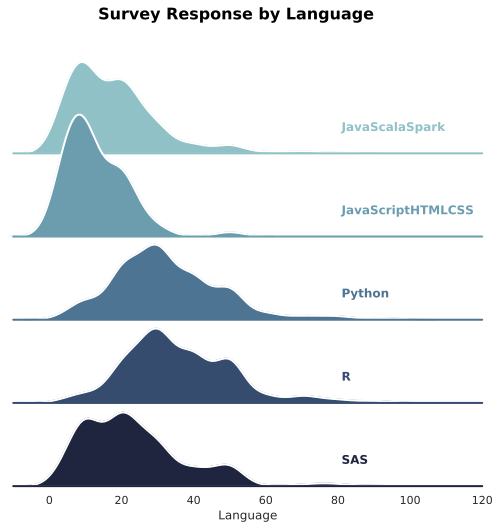

In [70]:
sns.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})
# Initialize the FacetGrid object
pal = sns.cubehelix_palette(5, rot=-0.25, light=0.7)
g = sns.FacetGrid(data=df1, row="Lang", hue="Lang", aspect=5, height=1.5, palette=pal)

# Draw the densities in a few steps
g.map(
    sns.kdeplot,
    "Percent",
    clip=(0, 100),
    clip_on=False,
    shade=True,
    alpha=1,
    lw=1.5,
    bw=4,
)
g.map(sns.kdeplot, "Percent", clip=(0, 100), clip_on=False, color="w", lw=2, bw=4)
g.map(plt.axhline, y=0, lw=2, clip_on=False)
g.set(xlim=(-10, 120))


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(
        0.7,
        0.2,
        label,
        fontweight="bold",
        color=color,
        ha="left",
        va="center",
        transform=ax.transAxes,
    )


g.map(label, "Language")

# Set the subplots to overlap
g.fig.subplots_adjust(hspace=-0.35)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[])
g.despine(bottom=True, left=True)
g.fig.suptitle(
    "Survey Response by Language", fontweight="bold", color="black", fontsize=16
)
plt.show()

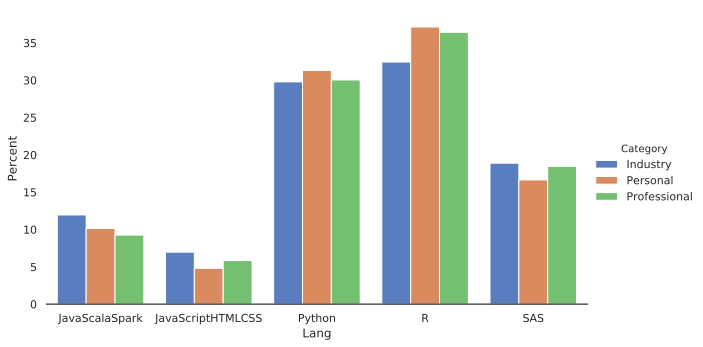

In [71]:
dt = df1.groupby(["Category", "Lang"])["Percent"].mean().reset_index()

g = sns.catplot(
    x="Lang",
    y="Percent",
    hue="Category",
    data=dt,
    height=5,
    kind="bar",
    palette="muted",
    aspect=1.7,
)
g.despine(left=True)

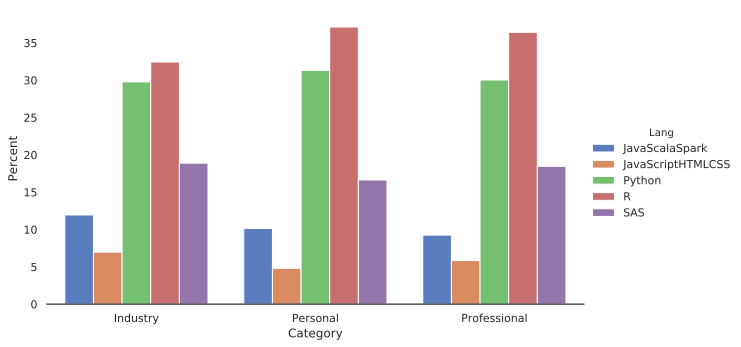

In [72]:
dt = df1.groupby(["Category", "Lang"])["Percent"].mean().reset_index()

g = sns.catplot(
    x="Category",
    y="Percent",
    hue="Lang",
    data=dt,
    height=5,
    kind="bar",
    palette="muted",
    aspect=1.7,
)

g.despine(left=True)

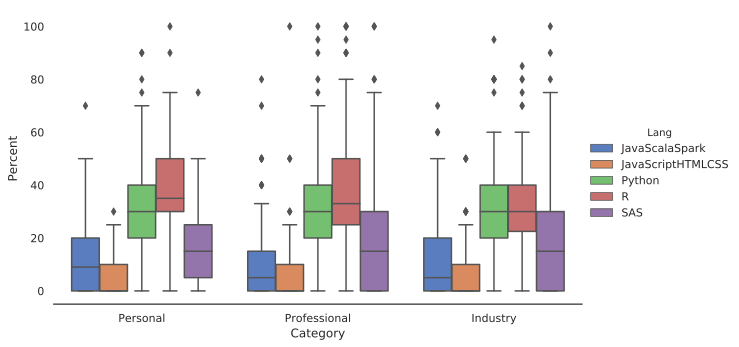

In [73]:
dt = df1.groupby(["Category", "Lang"])["Percent"].mean().reset_index()

g = sns.catplot(
    x="Category",
    y="Percent",
    hue="Lang",
    data=df1,
    kind="box",
    palette="muted",
    height=5,
    aspect=1.7,
)

g.despine(left=True)

In [74]:
# Determining Python Interest
df1["PyInt"] = df1["Python_Course_Interest"].apply(lambda x: 1 if x >= 0.5 else 0)

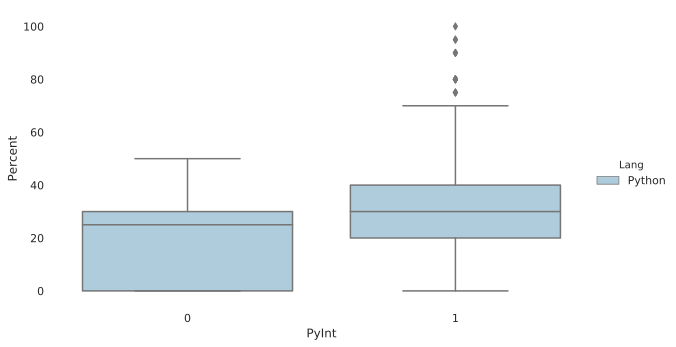

In [78]:
tt = df1[df1["Lang"] == "Python"]

g = sns.catplot(
    x="PyInt",
    y="Percent",
    hue="Lang",
    data=tt,
    height=5,
    kind="box",
    palette="Paired",
    aspect=1.7,
)

sns.despine(trim=True, left=True, bottom=True)

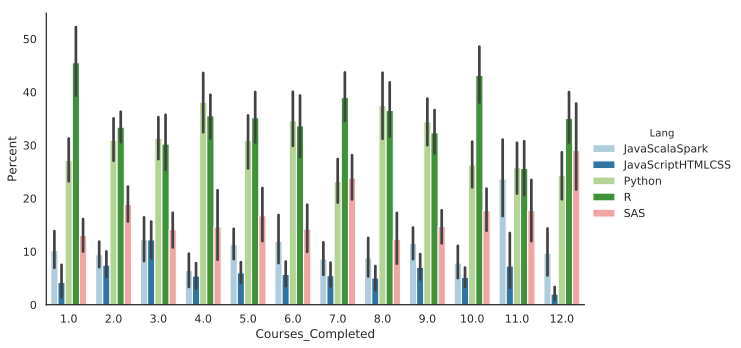

In [79]:
tt = df1[df1["Courses_Completed"].isnull() == False]

sns.catplot(
    x="Courses_Completed",
    y="Percent",
    hue="Lang",
    data=tt,
    height=5,
    kind="bar",
    palette="Paired",
    aspect=1.7,
)

In [80]:
tt.groupby(['Courses_Completed','Lang'])['Percent'].mean().reset_index()

,Courses_Completed,Lang,Percent
0,1.0,JavaScalaSpark,10.166667
1,1.0,JavaScriptHTMLCSS,4.166667
2,1.0,Python,27.111111
3,1.0,R,45.500000
4,1.0,SAS,13.055556
5,2.0,JavaScalaSpark,9.373333
6,2.0,JavaScriptHTMLCSS,7.440000
7,2.0,Python,30.933333
8,2.0,R,33.386667
9,2.0,SAS,18.866667


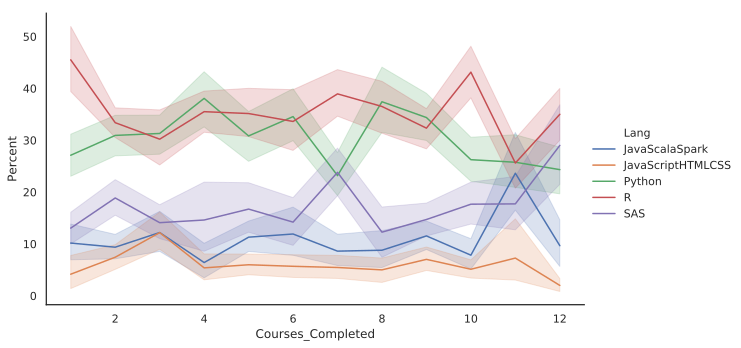

In [81]:
tt1 = tt.groupby(["Courses_Completed", "Lang"])["Percent"].mean().reset_index()

g = sns.relplot(
    x="Courses_Completed",
    y="Percent",
    hue="Lang",
    kind="line",
    data=df1,
    aspect=1.7,
    height=5,
)

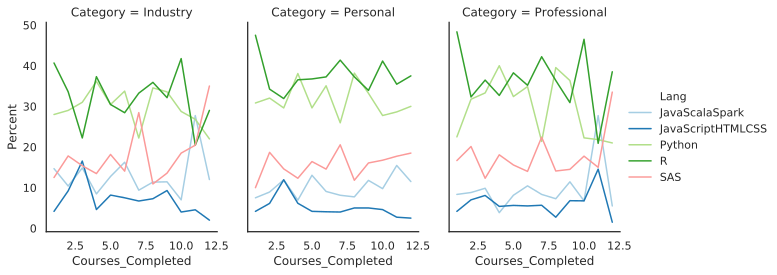

In [82]:
tt1 = (
    tt.groupby(["Courses_Completed", "Category", "Lang"])["Percent"]
    .mean()
    .reset_index()
)

g = sns.relplot(
    x="Courses_Completed",
    y="Percent",
    hue="Lang",
    kind="line",
    col="Category",
    palette="Paired",
    data=tt1,
    aspect=0.75,
    height=4,
)